EN ESTE NOTEBOOK VAMOS A REALIZAR EL EDA (ANALISIS EXPLORATORIO DE DATOS) DEL PROYECTO, CON EL FIN DE A TRACEZ DE DIVERSOS ANALISIS Y RELACIONES PODER ENCONTRAR PATRONES RELEVANTES PARA LOS OBJETIVOS PROPUESTOS

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os
import pyarrow as pa
import pyarrow.parquet as pq
from collections import Counter
from wordcloud import WordCloud
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [5]:
ruta_sgames= os.path.join('Data', 'steam_games.csv')
sgames = pd.read_csv(ruta_sgames, encoding='utf-8')

In [6]:
ruta_reviews = os.path.join('Data', 'user_review.csv')
ureviews = pd.read_csv(ruta_reviews, encoding='utf-8')

In [7]:
ruta_items = os.path.join('Data', 'user_items.csv')
uitems =pd.read_csv(ruta_items, encoding= 'utf-8')

In [8]:
sgames.columns

Index(['genres', 'app_name', 'price', 'id', 'developer', 'anio'], dtype='object')

In [9]:
sgames.head()

,genres,app_name,price,id,developer,anio
0,Action,Lost Summoner Kitty,4.99,761140,Kotoshiro,2018
1,Free to Play,Ironbound,0.00,643980,Secret Level SRL,2018
2,Casual,Real Pool 3D - Poolians,0.00,670290,Poolians.com,2017
3,Action,弹炸人2222,0.99,767400,彼岸领域,2017
4,Action,Battle Royale Trainer,3.99,772540,Trickjump Games Ltd,2018


In [10]:
sgames.tail()

,genres,app_name,price,id,developer,anio
28702,Action,Kebab it Up!,1.99,745400,Bidoniera Games,2018
28703,Casual,Colony On Mars,1.99,773640,"Nikita ""Ghost_RUS""",2018
28704,Casual,LOGistICAL: South Africa,4.99,733530,Sacada,2018
28705,Indie,Russian Roads,1.99,610660,Laush Dmitriy Sergeevich,2018
28706,Casual,EXIT 2 - Directions,4.99,658870,"xropi,stev3ns",2017


In [11]:
sgames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28707 entries, 0 to 28706
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   genres     28707 non-null  object 
 1   app_name   28707 non-null  object 
 2   price      28707 non-null  float64
 3   id         28707 non-null  int64  
 4   developer  28707 non-null  object 
 5   anio       28707 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 1.3+ MB


In [12]:
sgames.isnull().sum()

genres       0
app_name     0
price        0
id           0
developer    0
anio         0
dtype: int64

In [13]:
def percent(df, columna):
    df_perc = df[columna].value_counts(normalize=True).mul(100).round(2).reset_index()
    df_perc.columns = ["Valor", "Porcentaje"]
    df_perc["Porcentaje"] = df_perc["Porcentaje"].astype(str) + "%"
    df_count = df[columna].value_counts().reset_index()
    df_count.columns = ["Valor", "Cantidad"]
    df_perc = pd.merge(df_perc, df_count, on='Valor')

    # Seleccionar solo las columnas necesarias
    df_perc = df_perc[["Valor", "Porcentaje", "Cantidad"]]
    return df_perc
    

In [14]:
def csv_a_parquet(ruta_csv, ruta_parquet):
    df = pd.read_csv(ruta_csv)
    table = pa.Table.from_pandas(df)
    pq.write_table(table, ruta_parquet)

In [15]:
df_perc = percent(sgames,'genres')

In [16]:
df_perc

,Valor,Porcentaje,Cantidad
0,Action,38.89%,11164
1,Casual,15.08%,4328
2,Adventure,14.91%,4280
3,Indie,11.4%,3272
4,Simulation,6.42%,1843
5,Strategy,3.92%,1126
6,RPG,2.33%,668
7,Free to Play,1.79%,514
8,Racing,1.58%,453
9,Design &amp; Illustration,1.14%,327


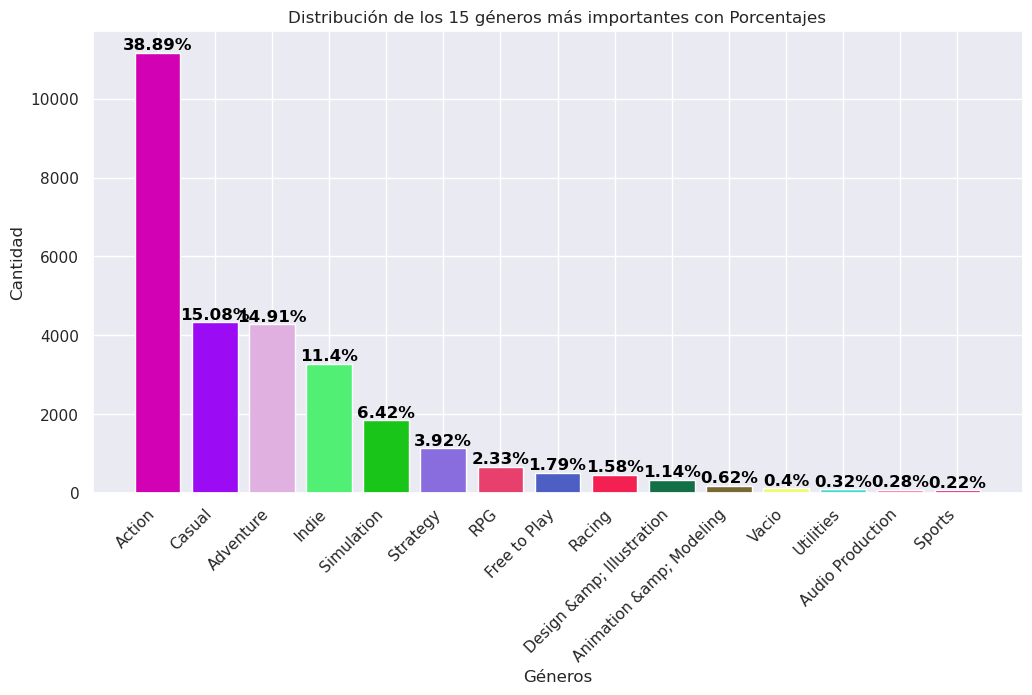

In [17]:
# Seleccionar solo los 15 géneros más importantes
df_top15 = df_perc.head(15)

num_barras = len(df_top15)
colores = np.random.rand(num_barras, 3)  

# Gráfico de barras con los 15 géneros más importantes
plt.figure(figsize=(12, 6))
bars = plt.bar(df_top15["Valor"], df_top15["Cantidad"], color=colores)

for bar, label in zip(bars, df_top15["Porcentaje"]):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, label,
             ha='center', va='bottom', rotation=0, color='black', fontweight='bold')

plt.xticks(rotation=45, ha='right')

plt.xlabel("Géneros")
plt.ylabel("Cantidad")
plt.title('Distribución de los 15 géneros más importantes con Porcentajes')

plt.show()


app_name

In [18]:
juegos_usados = sgames.groupby('app_name')['id'].count().reset_index()
juegos_usados.columns = ['Juego', 'Cantidad']

# Encontrar el juego más usado
juego_mas_usado = juegos_usados.loc[juegos_usados['Cantidad'].idxmax()]



In [19]:
juego_mas_usado

Juego       Soundtrack
Cantidad             3
Name: 21991, dtype: object

In [20]:
top_10_juegos = juegos_usados.nlargest(10, 'Cantidad')
top_10_juegos


,Juego,Cantidad
21991,Soundtrack,3
986,Aliens: Colonial Marines - Reconnaissance Pack,2
1031,Alter Ego,2
2614,Black Rose,2
3815,Castles,2
4454,Colony,2
5501,Dark Matter,2
12296,Invasion,2
12309,Invisible Apartment 2,2
12311,Invisible Apartment Zero,2


In [21]:
sgames['app_name'].unique()

array(['Lost Summoner Kitty', 'Ironbound', 'Real Pool 3D - Poolians', ...,
       'LOGistICAL: South Africa', 'Russian Roads', 'EXIT 2 - Directions'],
      dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

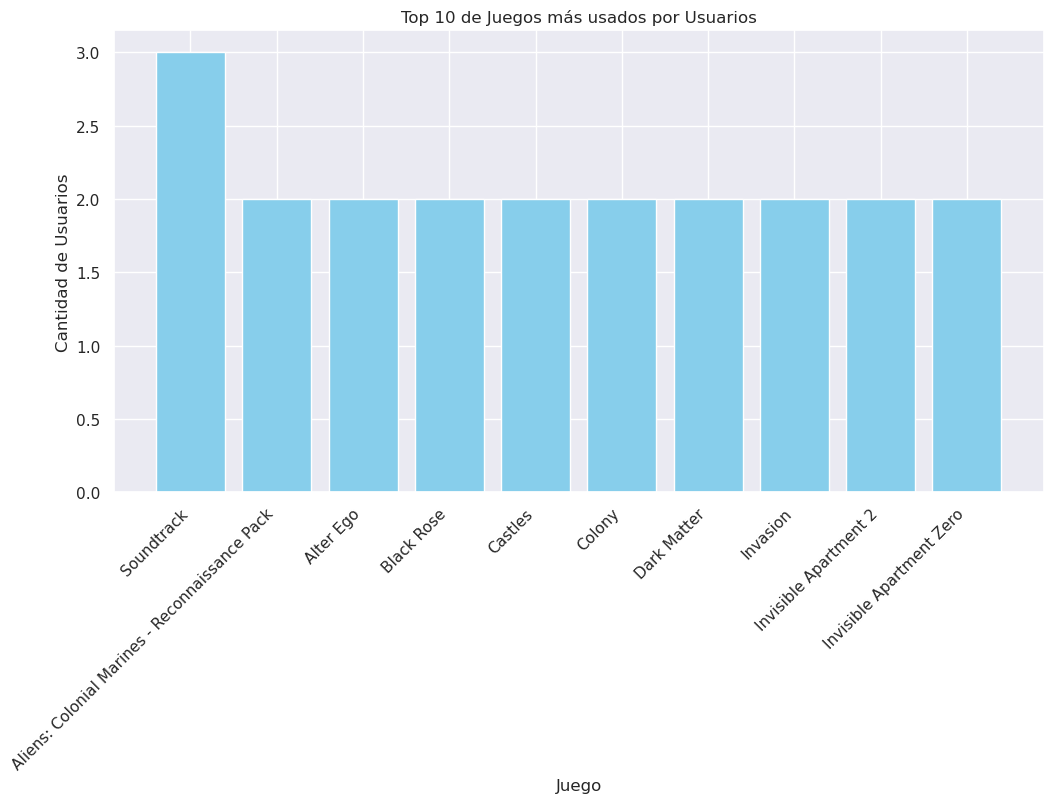

In [22]:
# Top 10 de juegos más usados
plt.figure(figsize=(12, 6))
plt.bar(top_10_juegos['Juego'], top_10_juegos['Cantidad'], color='skyblue')
plt.xlabel('Juego')
plt.ylabel('Cantidad de Usuarios')
plt.title('Top 10 de Juegos más usados por Usuarios')
plt.xticks(rotation=45, ha='right')  # Ajustar etiquetas para mejor visualizació

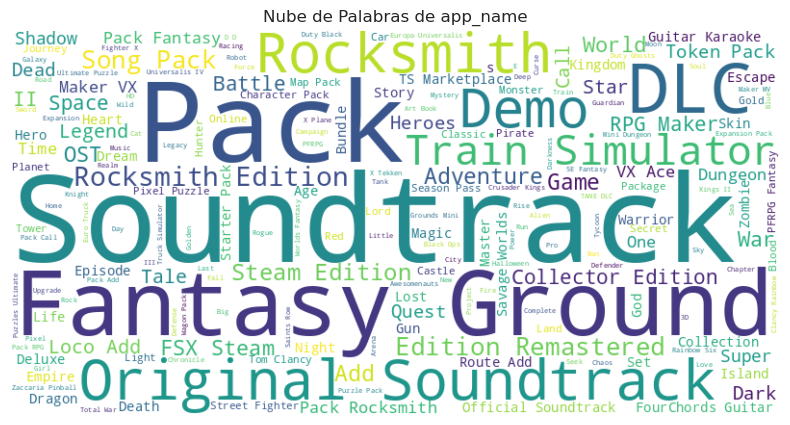

In [23]:
# Concatenar todos los títulos
text = ' '.join(sgames['app_name'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Graficar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de app_name')
plt.show()

In [24]:
# Encontrar los desarrolladores que más figuran
desarrolladores = sgames['developer'].value_counts().reset_index()
desarrolladores.columns = ['Desarrollador', 'Frecuencia']

# Mostrar los 10 desarrolladores más frecuentes
top_10_desarrolladores = desarrolladores.head(10)
print(top_10_desarrolladores)

                Desarrollador  Frecuencia
0     Ubisoft - San Francisco        1259
1         SmiteWorks USA, LLC         813
2              Dovetail Games         253
3  KOEI TECMO GAMES CO., LTD.         232
4  Paradox Development Studio         156
5                      Capcom         130
6                Ronimo Games         123
7             Choice of Games         100
8                     Musopia          95
9             Stainless Games          95


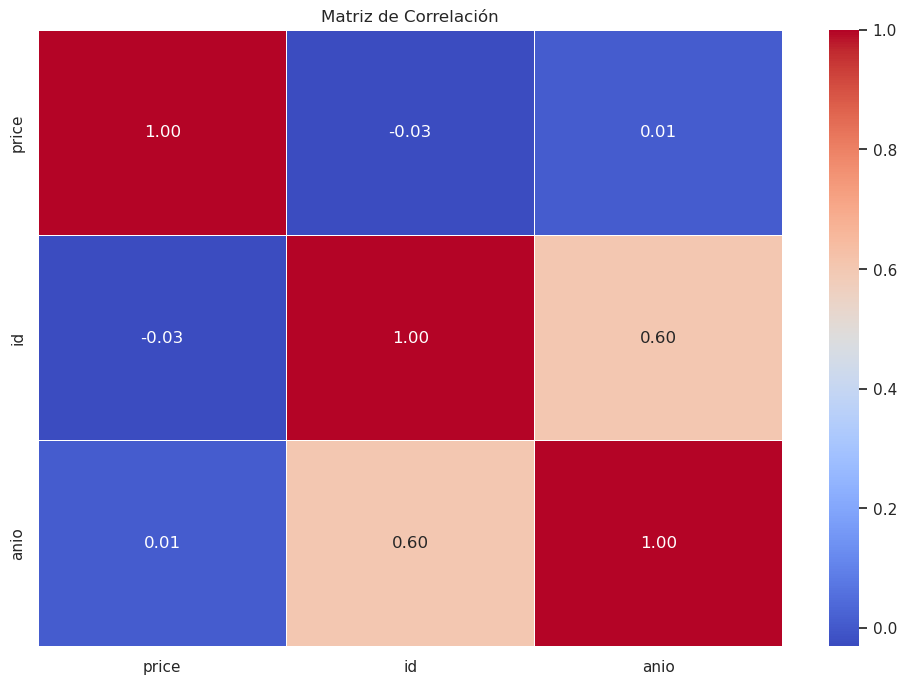

In [25]:
# Calcular la matriz de correlación
matriz_correlacion = sgames.corr()

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

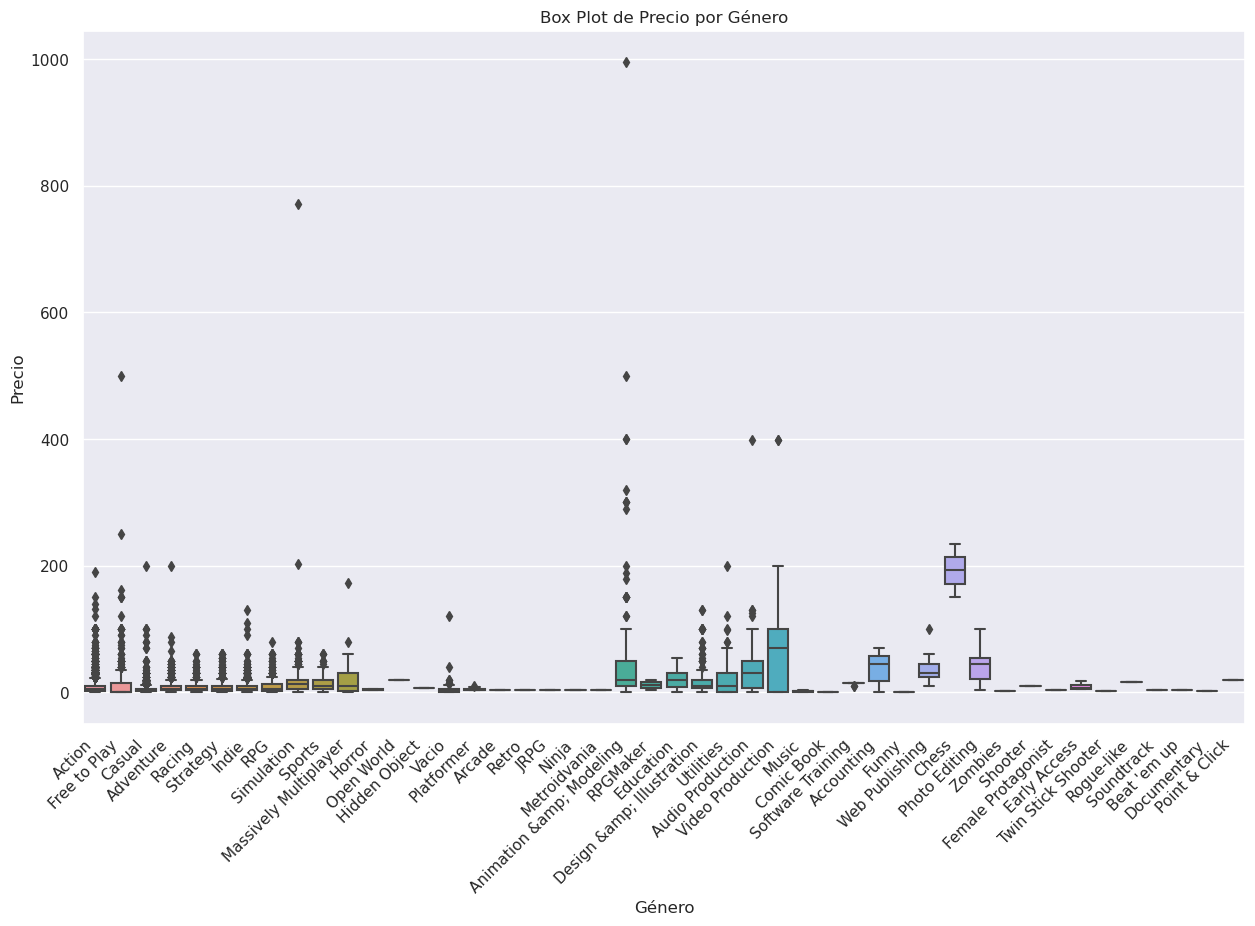

In [26]:
plt.figure(figsize=(15, 9))
sns.boxplot(x='genres', y='price', data=sgames)
plt.xlabel('Género')
plt.ylabel('Precio')
plt.title('Box Plot de Precio por Género')
plt.xticks(rotation=45, ha='right')
plt.show()


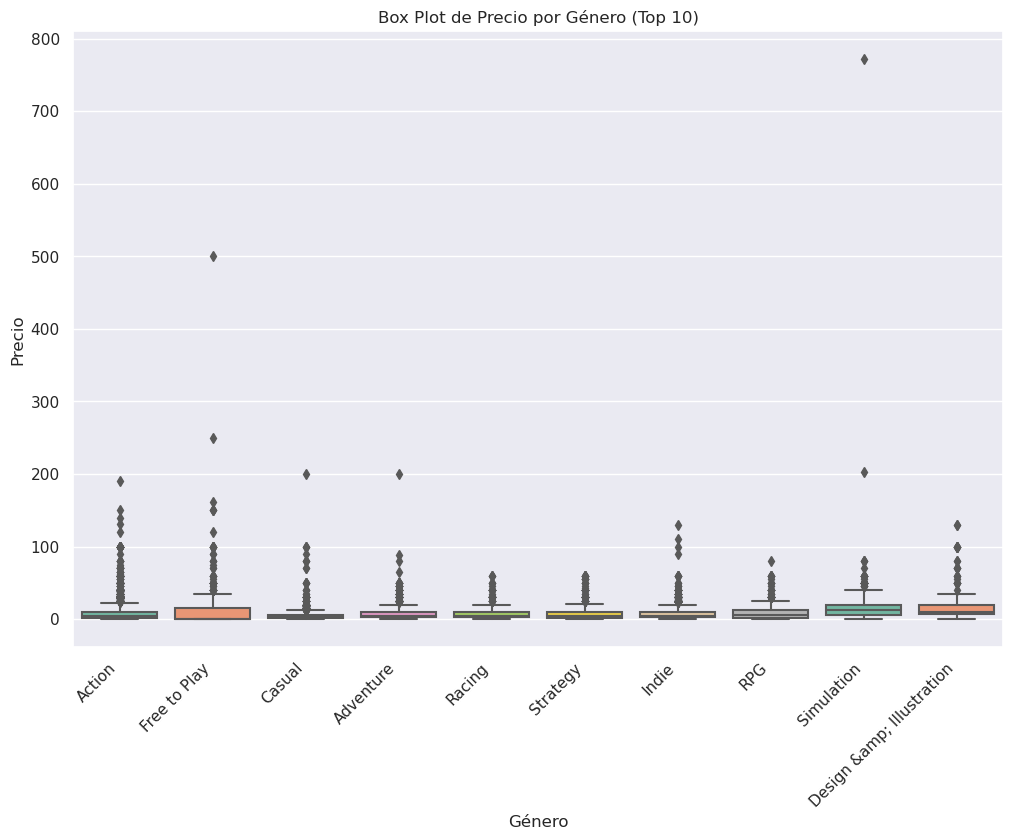

In [27]:
# Encontrar los top 10 géneros más frecuentes
top_10_generos = sgames['genres'].value_counts().head(10).index

# Filtrar el DataFrame para incluir solo los top 10 géneros
sgames_top10 = sgames[sgames['genres'].isin(top_10_generos)]

# Crear el boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='genres', y='price', data=sgames_top10, palette='Set2')
plt.title('Box Plot de Precio por Género (Top 10)')
plt.xlabel('Género')
plt.ylabel('Precio')
plt.xticks(rotation=45, ha='right')
plt.show()

In [28]:
anio_perc = percent(sgames,'anio')
anio_perc

,Valor,Porcentaje,Cantidad
0,2017,32.2%,9243
1,2016,23.41%,6721
2,2015,16.68%,4788
3,2014,9.58%,2751
4,2013,5.09%,1460
5,2012,4.04%,1160
6,2011,1.93%,554
7,2010,1.42%,409
8,2009,1.13%,324
9,2008,0.68%,196


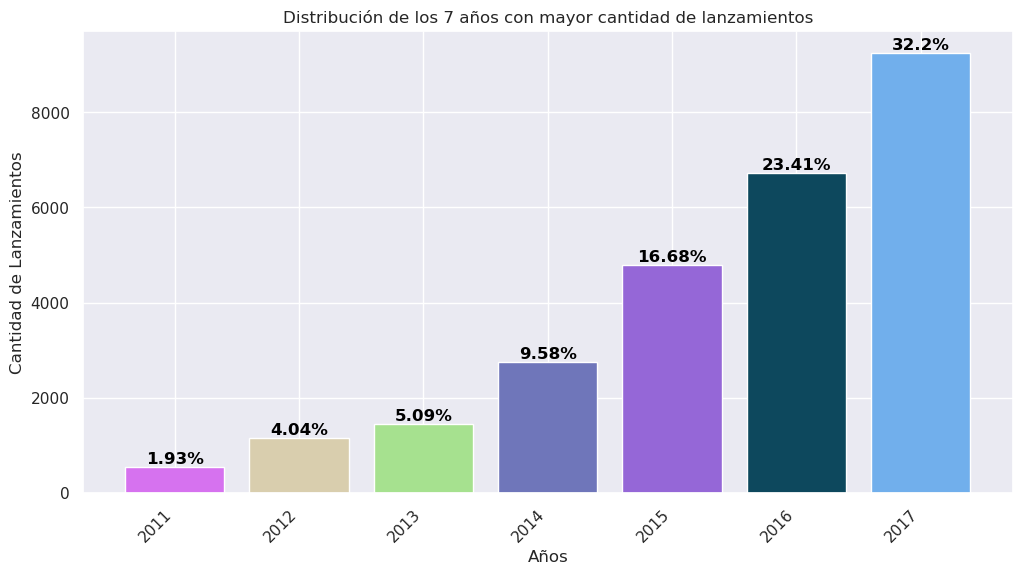

In [29]:
#Distribución de los 7 años con mayor cantidad de lanzamientos
anio_perc_top7 = anio_perc.head(7)

num_barras = len(anio_perc_top7)
colores = np.random.rand(num_barras, 3)  # RGB values

plt.figure(figsize=(12, 6))
bars = plt.bar(anio_perc_top7["Valor"], anio_perc_top7["Cantidad"], color=colores)

for bar, label in zip(bars, anio_perc_top7["Porcentaje"]):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, label,
             ha='center', va='bottom', rotation=0, color='black', fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Años")
plt.ylabel("Cantidad de Lanzamientos")
plt.title('Distribución de los 7 años con mayor cantidad de lanzamientos')
plt.show()


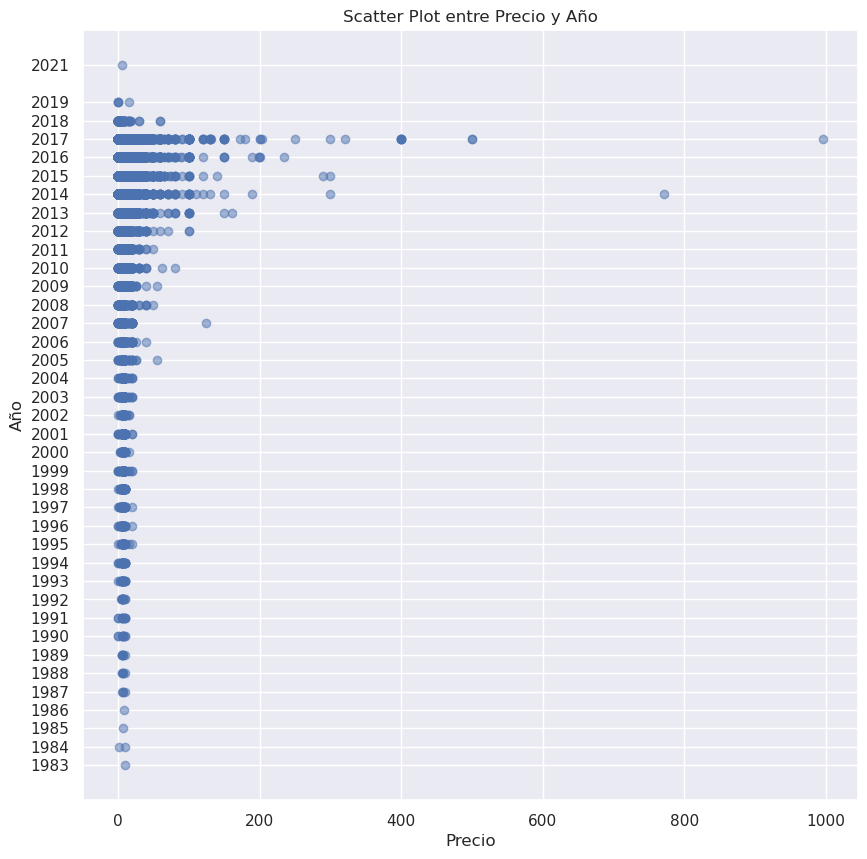

In [30]:
# Crear el scatter plot con marcas de año a año
plt.figure(figsize=(10, 10))
plt.scatter(sgames['price'], sgames['anio'], alpha=0.5)
plt.yticks(sgames['anio'].unique())
plt.ylabel('Año')
plt.xlabel('Precio')
plt.title('Scatter Plot entre Precio y Año')
plt.show()

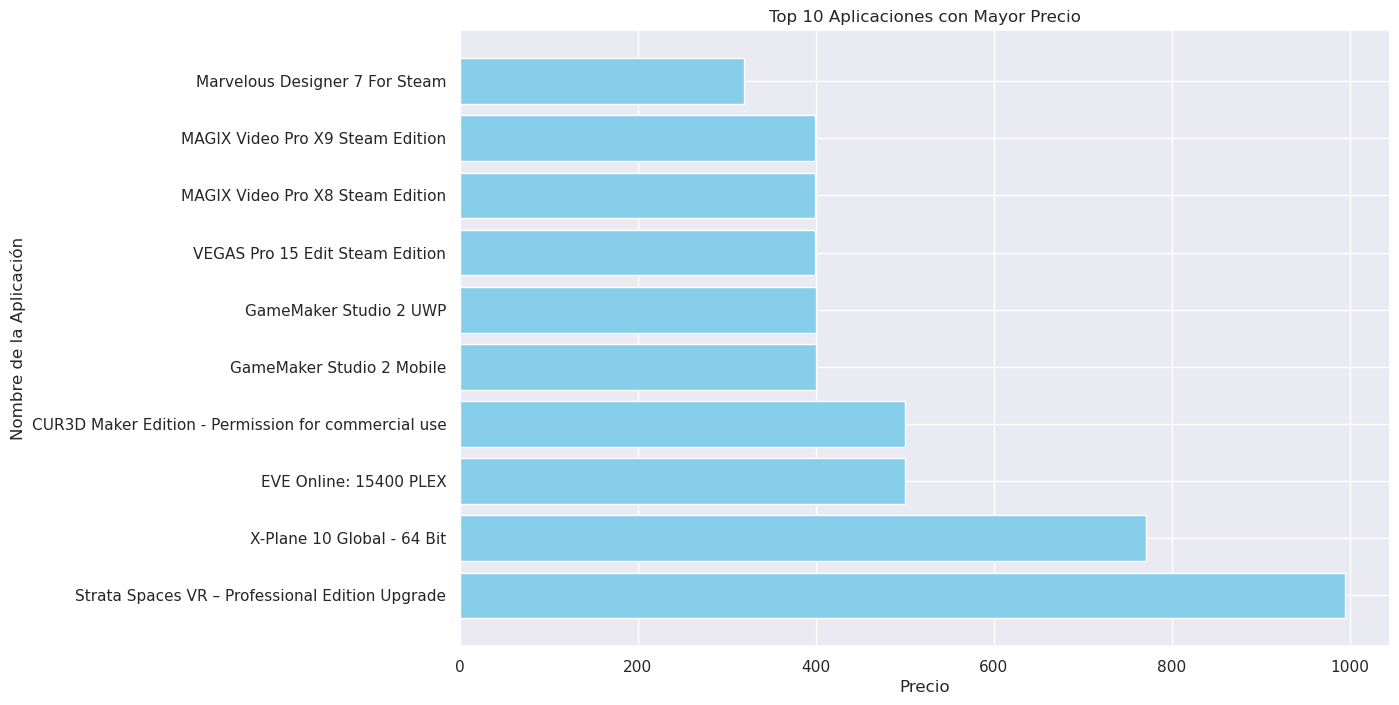

In [31]:
# Las 10 aplicaciones más caras
top_precios = sgames.sort_values(by='price', ascending=False).head(10)
plt.figure(figsize=(12, 8))
plt.barh(top_precios['app_name'], top_precios['price'], color='skyblue')
plt.xlabel('Precio')
plt.ylabel('Nombre de la Aplicación')
plt.title('Top 10 Aplicaciones con Mayor Precio')
plt.show()

In [32]:
# Las 10 aplicaciones con más usuarios
top_usuarios = sgames.sort_values(by='id', ascending=False).head(10)
top_usuarios

,genres,app_name,price,id,developer,anio
1408,Action,Bioshock Infinite: Columbia's Finest,4.99,2028850,"Irrational Games,Aspyr (Mac),Virtual Programmi...",2013
27151,Action,Assassin’s Creed® III Season Pass,29.99,2028103,Ubisoft Montreal,2012
26949,Action,Call of Duty®: Black Ops II Season Pass,49.99,2028062,Treyarch,2013
27316,Strategy,Worms Revolution Season Pass,14.99,2028056,Team17 Digital Ltd.,2012
27220,Action,Tom Clancy's Ghost Recon Future Soldier - Seas...,24.99,2028055,"Ubisoft Paris,Red Storm Entertainment",2012
27735,Action,Saints Row: The Third Season Pass DLC Pack,4.99,901805,Volition,2011
729,Strategy,Fate of the World: Tipping Point,18.99,901776,Red Redemption,2011
312,Strategy,The Stronghold Collection,19.99,901735,FireFly Studios,2009
658,Action,Magicka: Party Robes,1.99,901679,Arrowhead Game Studios,2011
27892,Strategy,Duels of the Planeswalkers Gold Game Bundle,19.99,901667,Stainless Games Ltd,2011


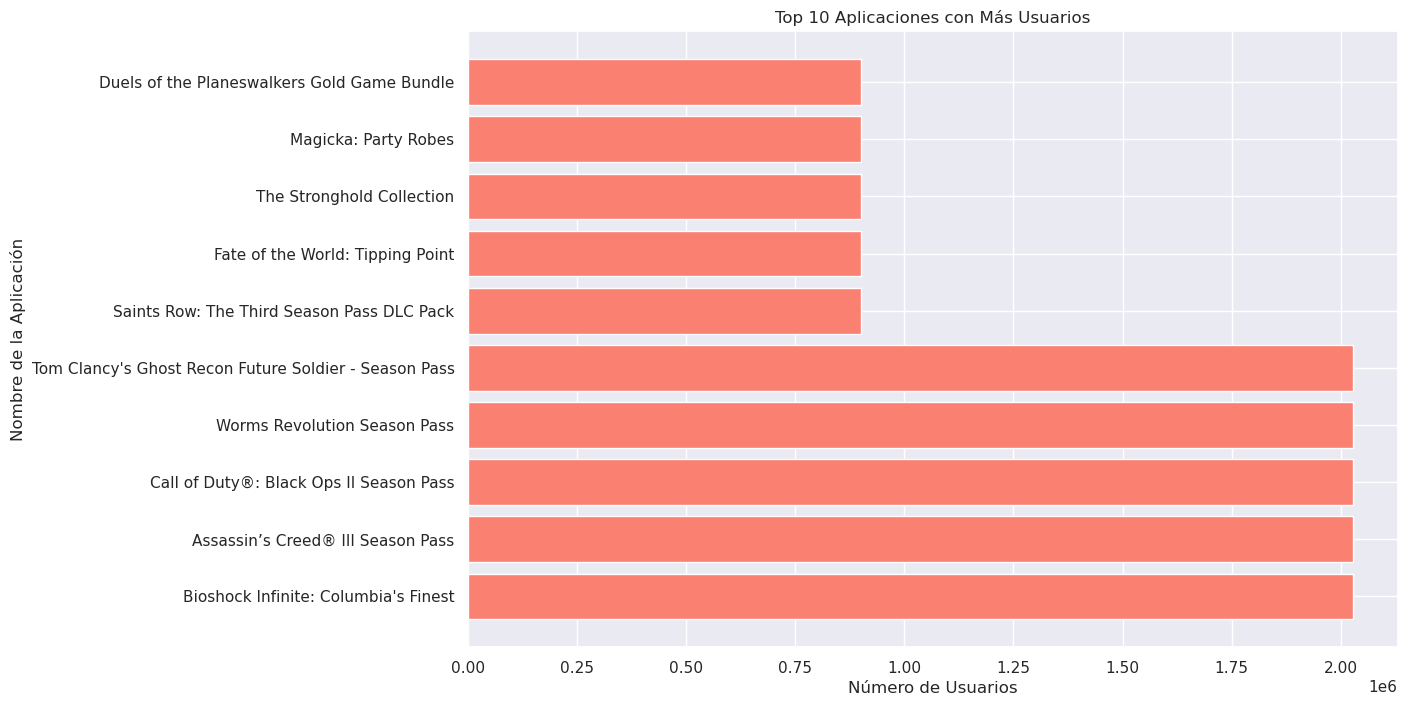

In [33]:
plt.figure(figsize=(12, 8))
plt.barh(top_usuarios['app_name'], top_usuarios['id'], color='salmon')
plt.xlabel('Número de Usuarios')
plt.ylabel('Nombre de la Aplicación')
plt.title('Top 10 Aplicaciones con Más Usuarios')
plt.show()

REVIEWS

In [34]:
ureviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58430 entries, 0 to 58429
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       58430 non-null  object 
 1   item_id       58430 non-null  int64  
 2   recommend     58430 non-null  bool   
 3   anio_post     58430 non-null  int64  
 4   sentimientos  58430 non-null  float64
 5   sentiments    58430 non-null  int64  
dtypes: bool(1), float64(1), int64(3), object(1)
memory usage: 2.3+ MB


In [35]:
ureviews.columns

Index(['user_id', 'item_id', 'recommend', 'anio_post', 'sentimientos',
       'sentiments'],
      dtype='object')

In [36]:
ureviews.isnull().sum()

user_id         0
item_id         0
recommend       0
anio_post       0
sentimientos    0
sentiments      0
dtype: int64

In [37]:
ureviews.shape

(58430, 6)

In [38]:
ureviews.head()

,user_id,item_id,recommend,anio_post,sentimientos,sentiments
0,76561197970982479,1250,True,2011,0.174444,1
1,76561197970982479,22200,True,2011,0.337500,1
2,76561197970982479,43110,True,2011,0.075000,1
3,js41637,251610,True,2014,0.114583,1
4,js41637,227300,True,2013,-0.036111,-1


In [39]:
ureviews.tail()

,user_id,item_id,recommend,anio_post,sentimientos,sentiments
58425,76561198312638244,70,True,2014,0.233333,1
58426,76561198312638244,362890,True,2014,0.142500,1
58427,LydiaMorley,273110,True,2014,0.087500,1
58428,LydiaMorley,730,True,2014,0.000000,0
58429,LydiaMorley,440,True,2014,0.300000,1


In [40]:
ureviews.describe()

,item_id,anio_post,sentimientos,sentiments
count,58430.000000,58430.000000,58430.000000,58430.000000
mean,169705.328188,2014.122968,0.103975,0.336728
std,132020.311111,0.769677,0.276522,0.811421
min,10.000000,2010.000000,-1.000000,-1.000000
25%,8930.000000,2014.000000,0.000000,0.000000
50%,218230.000000,2014.000000,0.050000,1.000000
75%,261640.000000,2015.000000,0.233333,1.000000
max,527340.000000,2015.000000,1.000000,1.000000


In [41]:
df_perc = percent(ureviews,'anio_post')
df_perc

,Valor,Porcentaje,Cantidad
0,2014,54.37%,31766
1,2015,31.07%,18154
2,2013,11.49%,6713
3,2012,2.06%,1201
4,2011,0.91%,530
5,2010,0.11%,66


In [42]:
df_perc = percent(ureviews,'sentiments')
df_perc

,Valor,Porcentaje,Cantidad
0,1,55.43%,32385
1,0,22.82%,13335
2,-1,21.75%,12710


In [43]:
df_perc = percent(ureviews,'recommend')
df_perc

,Valor,Porcentaje,Cantidad
0,True,88.47%,51691
1,False,11.53%,6739


In [44]:
# Cantidad de recomendaciones positivas y negativas
recomendaciones_count = ureviews['recommend'].value_counts()
recomendaciones_count 


True     51691
False     6739
Name: recommend, dtype: int64

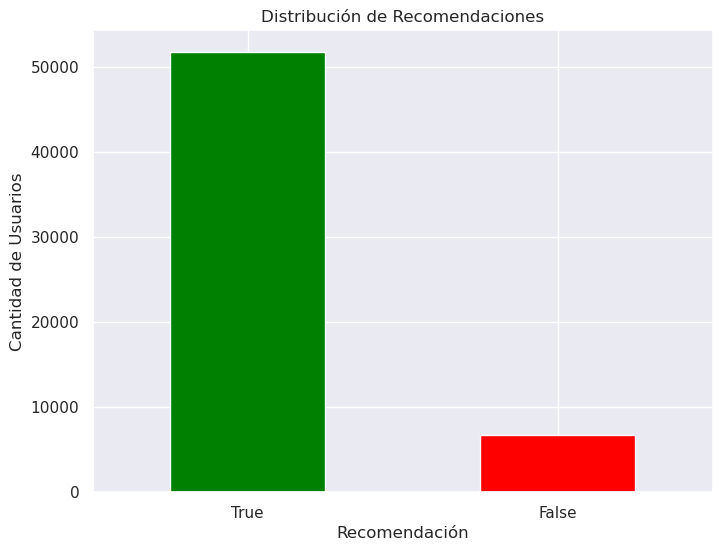

In [45]:
plt.figure(figsize=(8, 6))
recomendaciones_count.plot(kind='bar', color=['green', 'red'])
plt.title('Distribución de Recomendaciones')
plt.xlabel('Recomendación')
plt.ylabel('Cantidad de Usuarios')
plt.xticks(rotation=0)
plt.show()

In [46]:
# Cantidad de cada sentimiento
sentimientos_count = ureviews['sentiments'].value_counts()
sentimientos_count 

 1    32385
 0    13335
-1    12710
Name: sentiments, dtype: int64

In [47]:
# Cantidad de cada sentimiento con detalle decimal
sentimientos_dec = ureviews['sentimientos'].value_counts()
sentimientos_dec 

 0.000000    13335
 0.300000     2498
-0.400000     1987
 0.200000     1422
 0.500000     1263
             ...  
-0.119629        1
 0.033888        1
 0.102506        1
-0.021819        1
 0.142500        1
Name: sentimientos, Length: 10484, dtype: int64

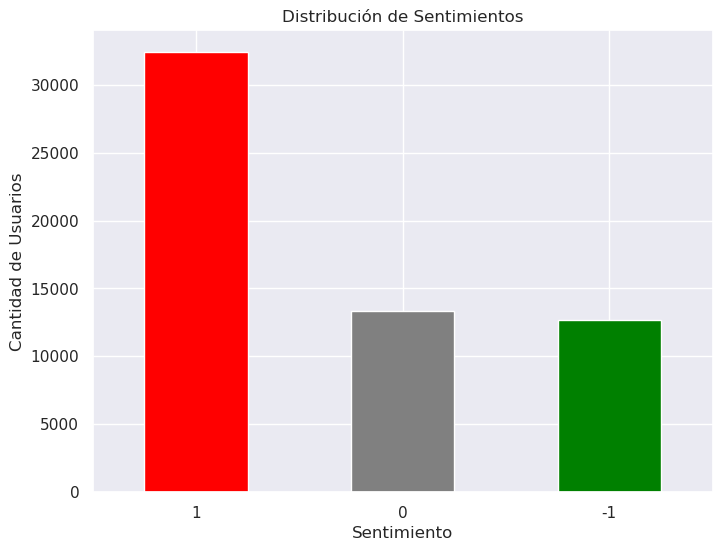

In [48]:
plt.figure(figsize=(8, 6))
sentimientos_count.plot(kind='bar', color=['red', 'gray', 'green'])
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Usuarios')
plt.xticks(rotation=0)
plt.show()

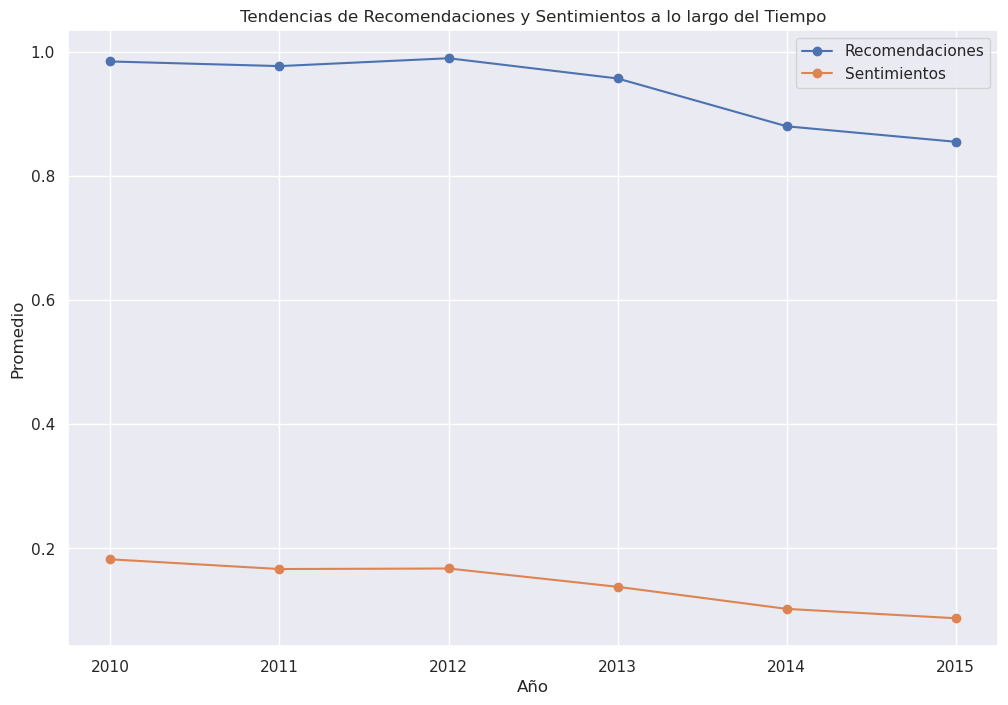

In [49]:
# Tendencias a lo largo del tiempo
plt.figure(figsize=(12, 8))

# Tendencia de Recomendaciones
plt.plot(ureviews.groupby('anio_post')['recommend'].mean(), label='Recomendaciones', marker='o')

# Tendencia de Sentimientos
plt.plot(ureviews.groupby('anio_post')['sentimientos'].mean(), label='Sentimientos', marker='o')

plt.title('Tendencias de Recomendaciones y Sentimientos a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Promedio')
plt.legend()
plt.show()

In [50]:
# Correlación entre sentimientos y recomendaciones
correlacion = ureviews['recommend'].corr(ureviews['sentiments'])
print(f"Correlación entre sentimientos y recomendaciones: {correlacion}")

Correlación entre sentimientos y recomendaciones: 0.2408972895148828


In [51]:
# Correlación entre sentimientos con valores decimales y recomendaciones
correlacion2 = ureviews['sentimientos'].corr(ureviews['recommend'])
print(f"Correlación entre sentimientos y recomendaciones: {correlacion}")

Correlación entre sentimientos y recomendaciones: 0.2408972895148828


In [52]:
# Calcular la correlación entre sentimientos y recomendaciones
correlacion = ureviews['sentiments'].corr(ureviews['sentimientos'])
print(f"Correlación entre sentimientos y recomendaciones: {correlacion}")

Correlación entre sentimientos y recomendaciones: 0.7273421908161194


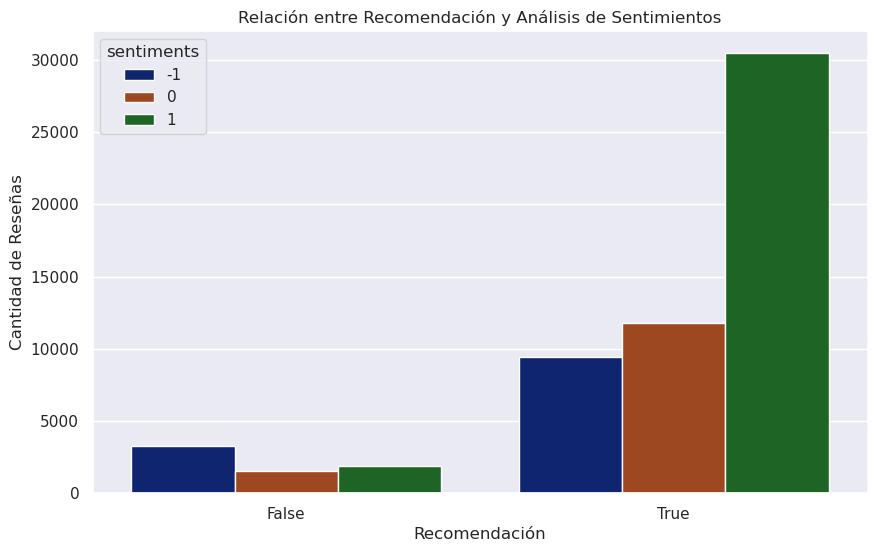

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(x="recommend", hue="sentiments", data=ureviews, palette="dark")
plt.title("Relación entre Recomendación y Análisis de Sentimientos")
plt.xlabel("Recomendación")
plt.ylabel("Cantidad de Reseñas")
plt.show()

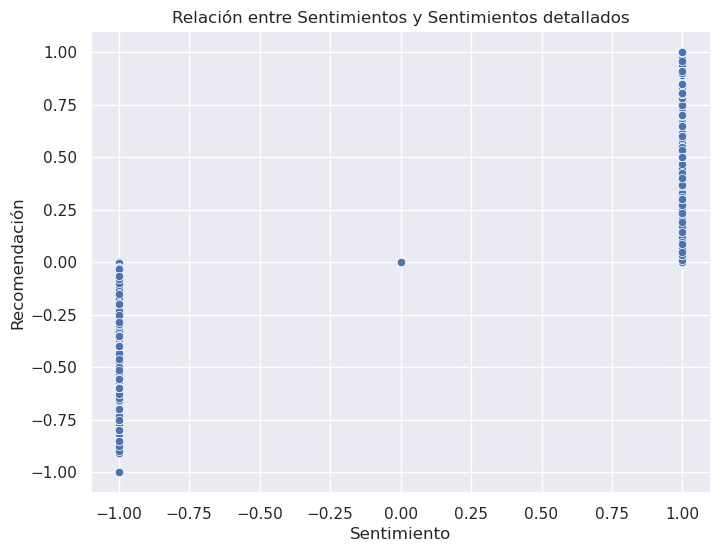

In [54]:
# Gráfico de dispersión entre sentimientos con valores decimales y sentimientos
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sentiments', y='sentimientos', data=ureviews)
plt.title('Relación entre Sentimientos y Sentimientos detallados')
plt.xlabel('Sentimiento')
plt.ylabel('Recomendación')
plt.show()

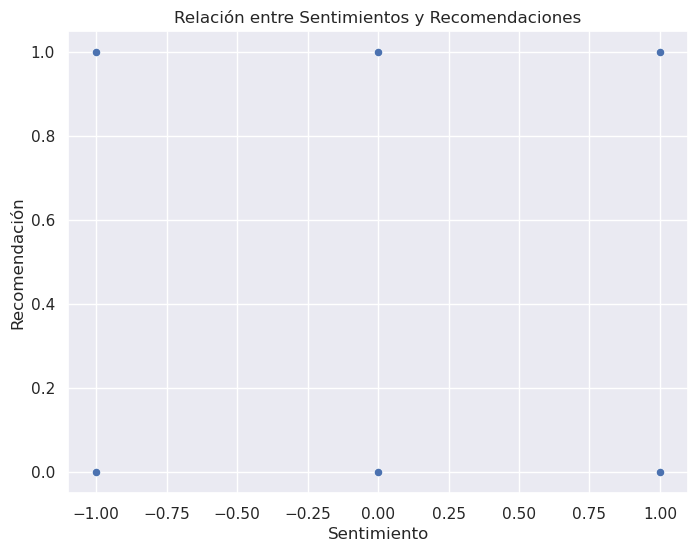

In [55]:
# Gráfico de dispersión entre sentimientos y recomendaciones
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sentiments', y='recommend', data=ureviews)
plt.title('Relación entre Sentimientos y Recomendaciones')
plt.xlabel('Sentimiento')
plt.ylabel('Recomendación')
plt.show()

In [56]:
columnas_numericas = ureviews.select_dtypes(include='number')

# Matriz de correlación
matriz_correlacion = columnas_numericas.corr()
print("Matriz de Correlación:")
print(matriz_correlacion)

Matriz de Correlación:
               item_id  anio_post  sentimientos  sentiments
item_id       1.000000   0.244207     -0.061561   -0.033584
anio_post     0.244207   1.000000     -0.064528   -0.052188
sentimientos -0.061561  -0.064528      1.000000    0.727342
sentiments   -0.033584  -0.052188      0.727342    1.000000


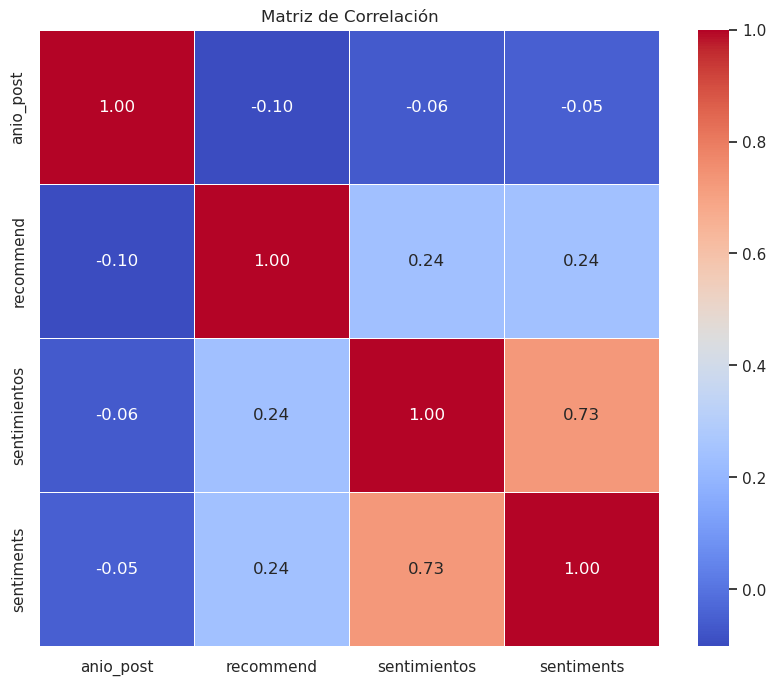

In [57]:
columnas_seleccionadas = ['anio_post', 'recommend', 'sentimientos', 'sentiments']

df_seleccionado = ureviews[columnas_seleccionadas]

# Convertir valores booleanos a numéricos (True: 1, False: 0)
df_seleccionado['recommend'] = df_seleccionado['recommend'].astype(int)

# Matriz de correlación
matriz_correlacion = df_seleccionado.corr()

# Mapa de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

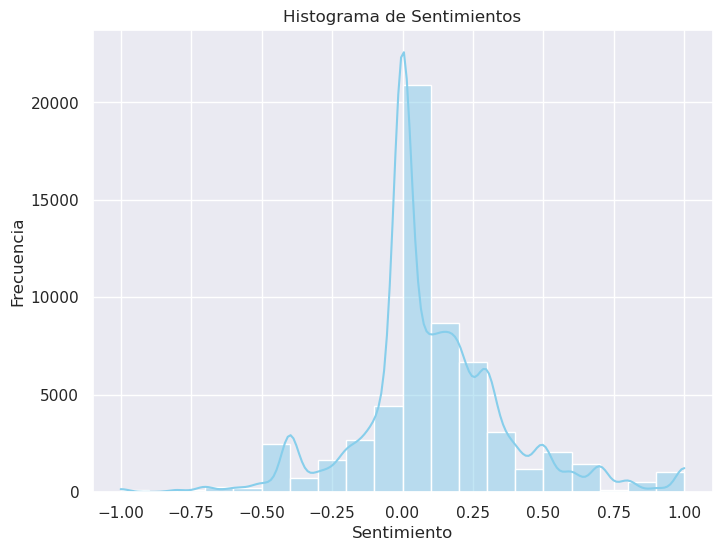

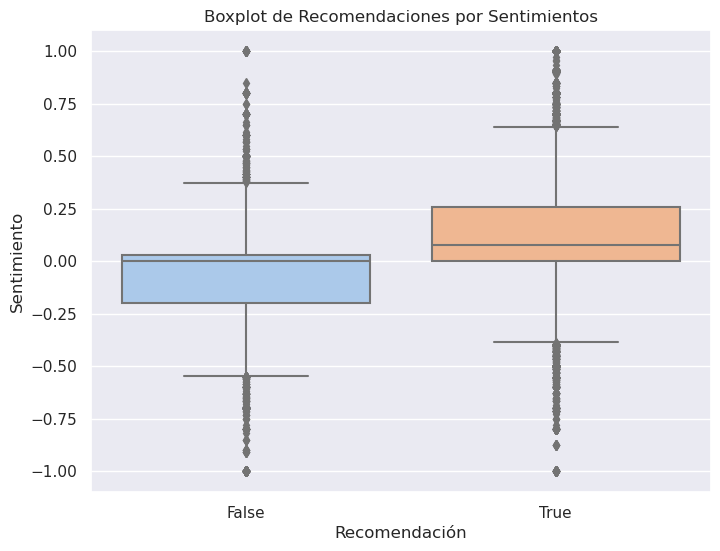

In [58]:
# Histograma de Sentimientos
plt.figure(figsize=(8, 6))
sns.histplot(ureviews['sentimientos'], bins=20, kde=True, color='skyblue')
plt.title('Histograma de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de Recomendaciones
plt.figure(figsize=(8, 6))
sns.boxplot(x=ureviews['recommend'], y=ureviews['sentimientos'], palette='pastel')
plt.title('Boxplot de Recomendaciones por Sentimientos')
plt.xlabel('Recomendación')
plt.ylabel('Sentimiento')
plt.show()

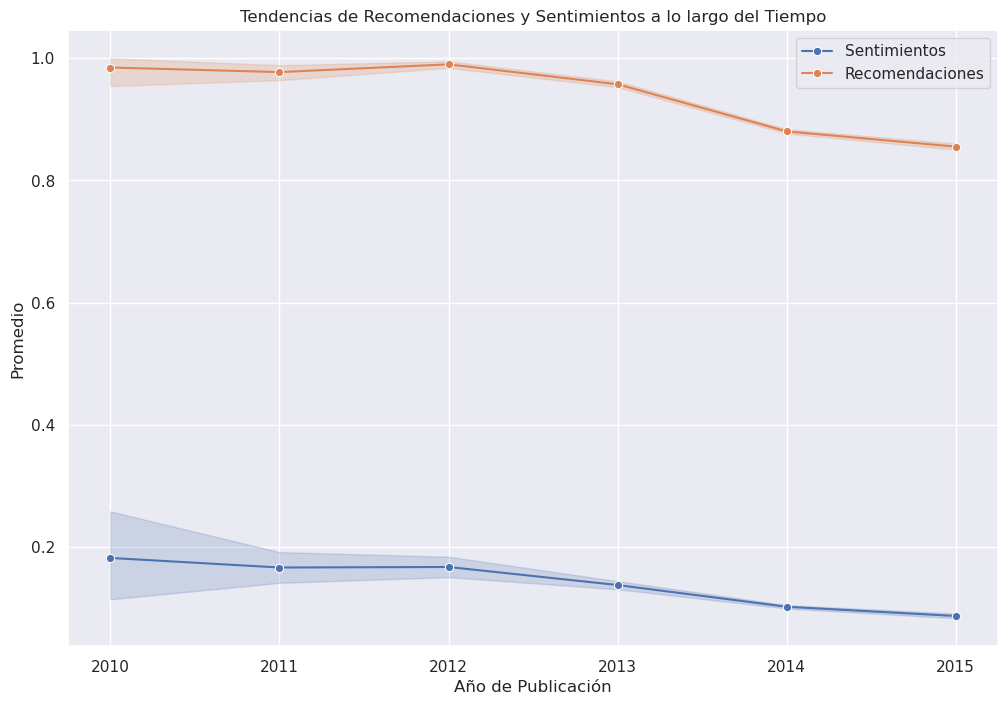

In [59]:
# Tendencia de Recomendaciones y Sentimientos a lo largo del tiempo
plt.figure(figsize=(12, 8))
sns.lineplot(x='anio_post', y='sentimientos', data=ureviews, label='Sentimientos', marker='o')
sns.lineplot(x='anio_post', y='recommend', data=ureviews, label='Recomendaciones', marker='o')
plt.title('Tendencias de Recomendaciones y Sentimientos a lo largo del Tiempo')
plt.xlabel('Año de Publicación')
plt.ylabel('Promedio')
plt.legend()
plt.show()

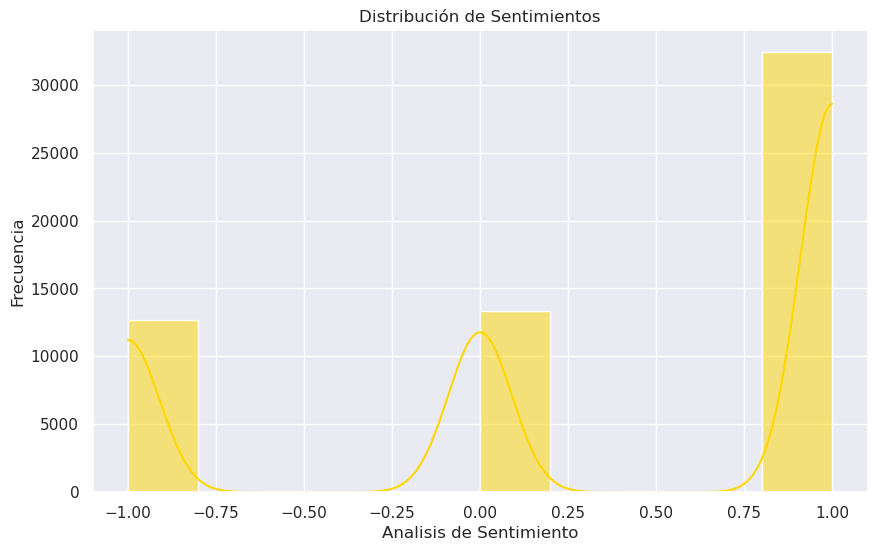

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(ureviews["sentiments"], bins=10, kde=True, color="gold")
plt.title("Distribución de Sentimientos")
plt.xlabel("Analisis de Sentimiento")
plt.ylabel("Frecuencia")
plt.show()

<Figure size 1200x800 with 0 Axes>

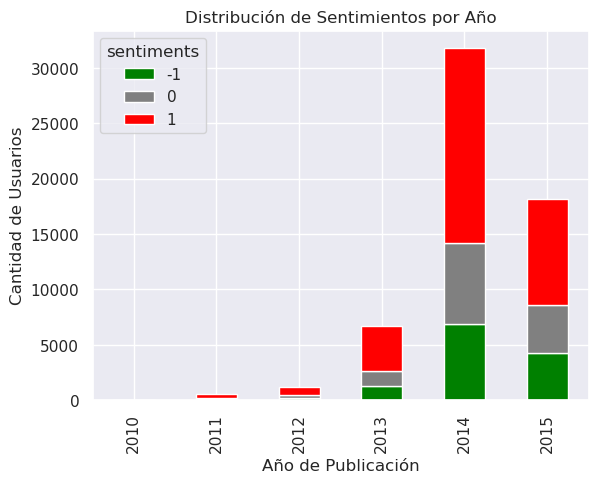

In [61]:

# Contar la cantidad de recomendaciones positivas y negativas por año
recomendaciones_por_anio = ureviews.groupby(['anio_post', 'sentiments']).size().unstack()

# Gráfico de Barras Apiladas
plt.figure(figsize=(12, 8))
recomendaciones_por_anio.plot(kind='bar', stacked=True, color=['green', 'gray', 'red'])
plt.title('Distribución de Sentimientos por Año')
plt.xlabel('Año de Publicación')
plt.ylabel('Cantidad de Usuarios')
plt.show()

In [62]:
items = ureviews["item_id"].value_counts()
items

730       3708
440       3694
4000      1704
570       1544
218620    1113
          ... 
33100        1
312720       1
449980       1
32770        1
431510       1
Name: item_id, Length: 3682, dtype: int64

In [63]:
top_10_items = items.head(10)
top_10_items

730       3708
440       3694
4000      1704
570       1544
218620    1113
304930    1031
252490     806
550        743
105600     729
221100     729
Name: item_id, dtype: int64

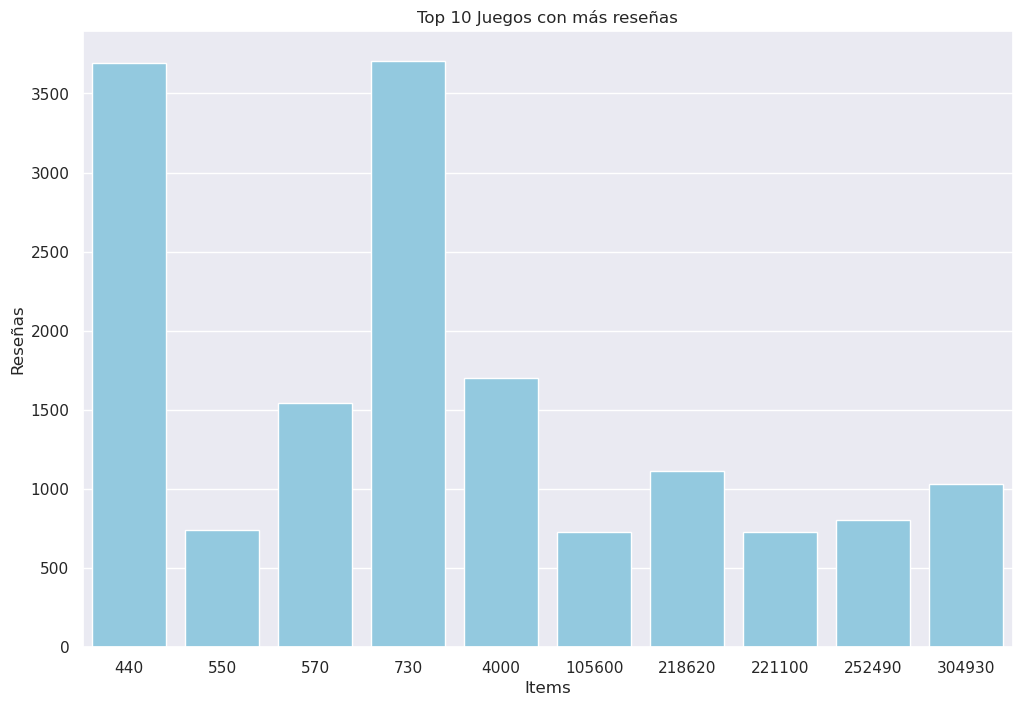

In [64]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_items.index, y=top_10_items.values, color="skyblue")
plt.title("Top 10 Juegos con más reseñas")
plt.xlabel("Items")
plt.ylabel("Reseñas")
plt.show()

ITEMS

In [65]:
uitems

,user_id,items_count,steam_id,item_id,item_name,playtime_forever
0,76561197970982479,277,76561197970982479,10,Counter-Strike,0.10
1,76561197970982479,277,76561197970982479,30,Day of Defeat,0.12
2,76561197970982479,277,76561197970982479,300,Day of Defeat: Source,78.88
3,76561197970982479,277,76561197970982479,240,Counter-Strike: Source,30.88
4,76561197970982479,277,76561197970982479,3830,Psychonauts,5.55
...,...,...,...,...,...,...
3246357,76561198329548331,7,76561198329548331,304930,Unturned,11.28
3246358,76561198329548331,7,76561198329548331,227940,Heroes & Generals,0.72
3246359,76561198329548331,7,76561198329548331,388490,One Way To Die: Steam Edition,0.05
3246360,76561198329548331,7,76561198329548331,521570,You Have 10 Seconds 2,0.07


In [66]:
uitems.isnull().sum()

user_id             0
items_count         0
steam_id            0
item_id             0
item_name           0
playtime_forever    0
dtype: int64

In [67]:
uitems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3246362 entries, 0 to 3246361
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   items_count       int64  
 2   steam_id          int64  
 3   item_id           int64  
 4   item_name         object 
 5   playtime_forever  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 148.6+ MB


In [68]:
count_user = (uitems.groupby('user_id')['items_count'].agg(['count']).sort_values(by='count', ascending=False).reset_index().explode('count')).rename(columns={'count': 'items_count'})

In [69]:
count_user

,user_id,items_count
0,chidvd,3475
1,thugnificent,3160
2,phrostb,2984
3,djnemonic,2545
4,Steamified,2481
...,...,...
68398,76561198070696754,1
68399,painv,1
68400,76561198102329181,1
68401,76561198102328239,1


In [70]:
count_user.describe()

,items_count
count,68403.000000
mean,47.459351
std,68.120832
min,1.000000
25%,11.000000
50%,29.000000
75%,62.000000
max,3475.000000


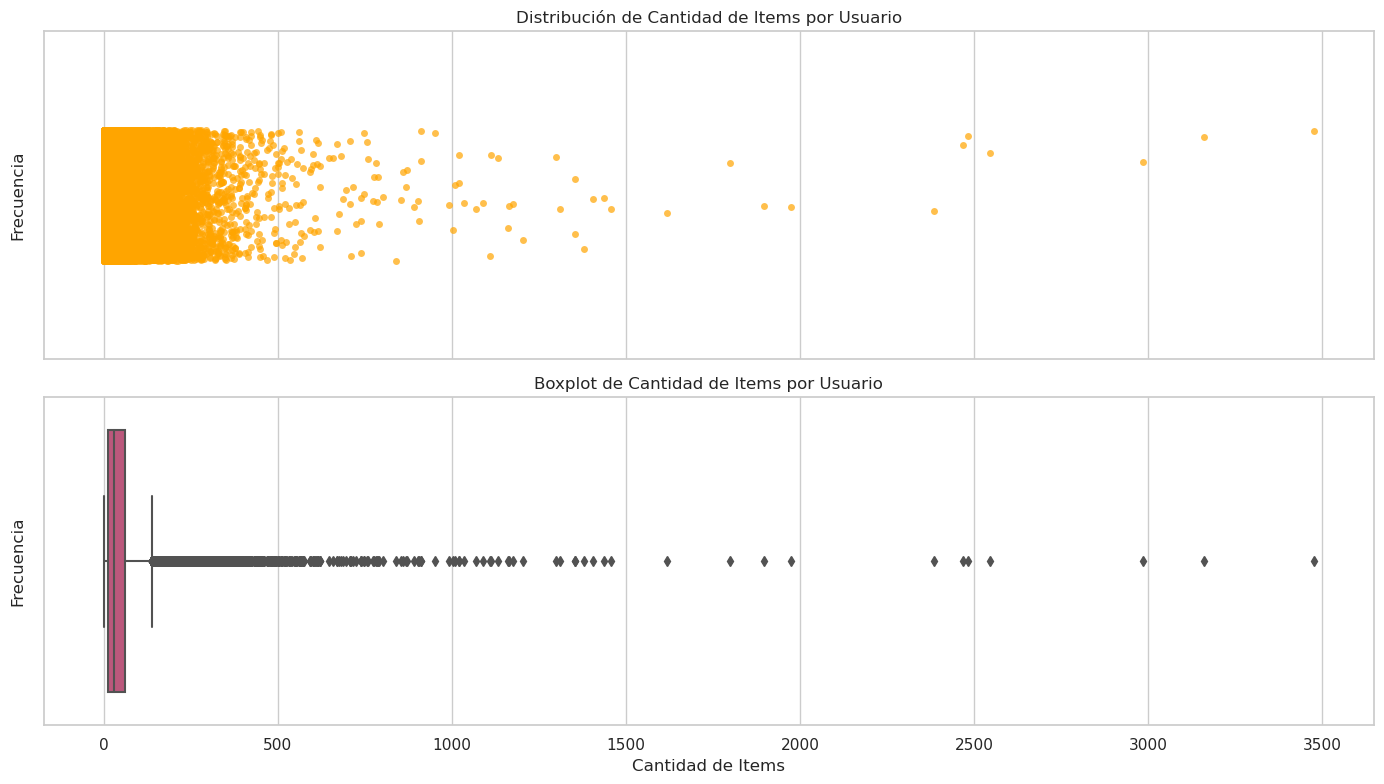

In [71]:
# Creamos un un Stripplot y un Boxplot para visualizar la distribución de la cantidad de items por usuario
sns.set(style="whitegrid", palette="plasma")

fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Subplot 1 - Stripplot
sns.stripplot(data=count_user, x='items_count', ax=axes[0], color="orange", jitter=0.2, alpha=0.7)
axes[0].set_xlabel('Cantidad de Items')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Cantidad de Items por Usuario')

# Subplot 2 - Boxplot
sns.boxplot(data=count_user, x='items_count', ax=axes[1], palette="plasma")
axes[1].set_xlabel('Cantidad de Items')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Boxplot de Cantidad de Items por Usuario')

plt.tight_layout()
plt.show()

In [72]:
item_games = len(uitems['item_name'].unique())
item_games

10024

In [73]:
user_hours = (
    uitems.groupby('user_id')['playtime_forever']
    .agg(['unique'])
    .explode('unique')
    .reset_index()
    .rename(columns={'unique': 'playtime_forever'})
    .sort_values('playtime_forever', ascending=False)
)


In [74]:
user_hours

,user_id,playtime_forever
2790531,wolop,10712.88
1560954,Evilutional,10588.25
260236,76561198019826668,10540.87
418204,76561198039832932,10223.52
2753002,tsunamitad,10001.13
...,...,...
1092537,76561198078062945,0.02
1337333,76561198101995099,0.02
891484,76561198066935199,0.02
626962,76561198051717662,0.02


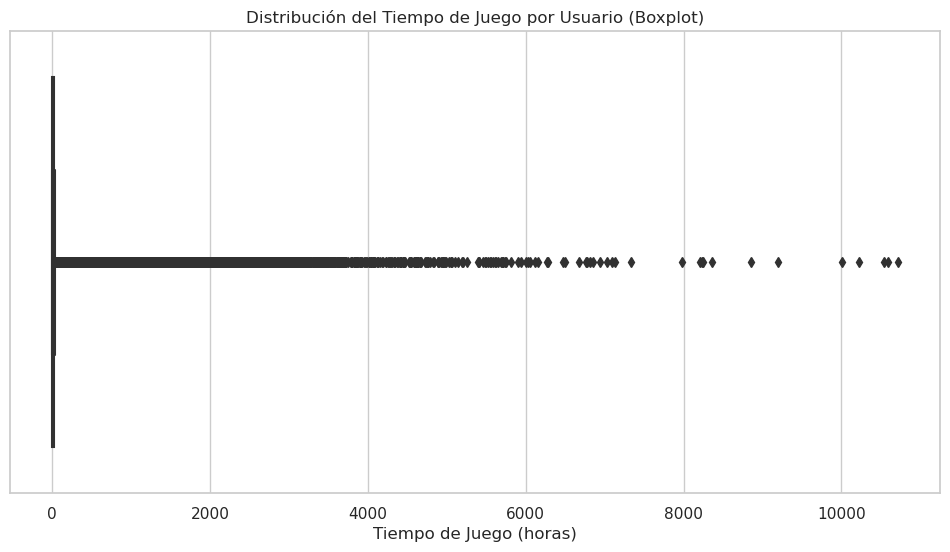

In [75]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='playtime_forever', data=user_hours)
plt.title('Distribución del Tiempo de Juego por Usuario (Boxplot)')
plt.xlabel('Tiempo de Juego (horas)')
plt.show()

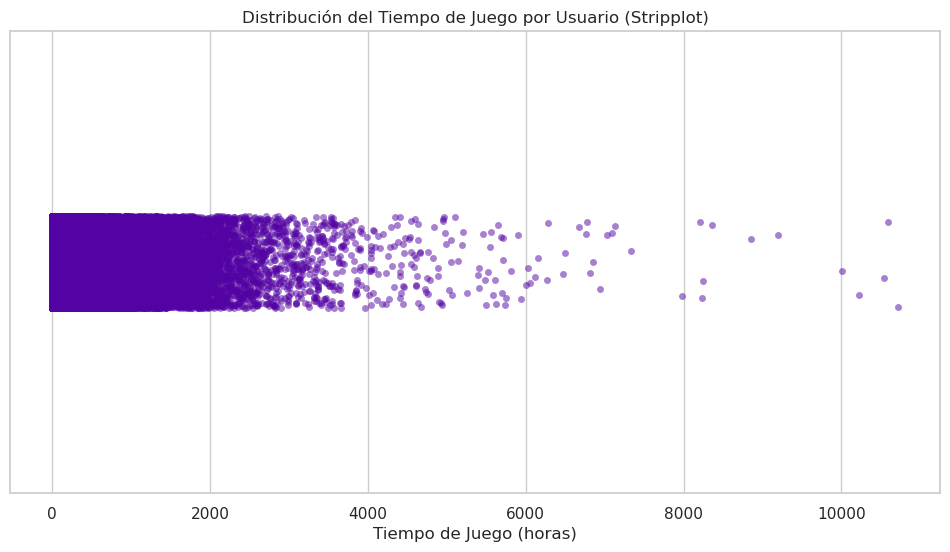

In [76]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='playtime_forever', data=user_hours, jitter=True, alpha=0.5)
plt.title('Distribución del Tiempo de Juego por Usuario (Stripplot)')
plt.xlabel('Tiempo de Juego (horas)')
plt.show()

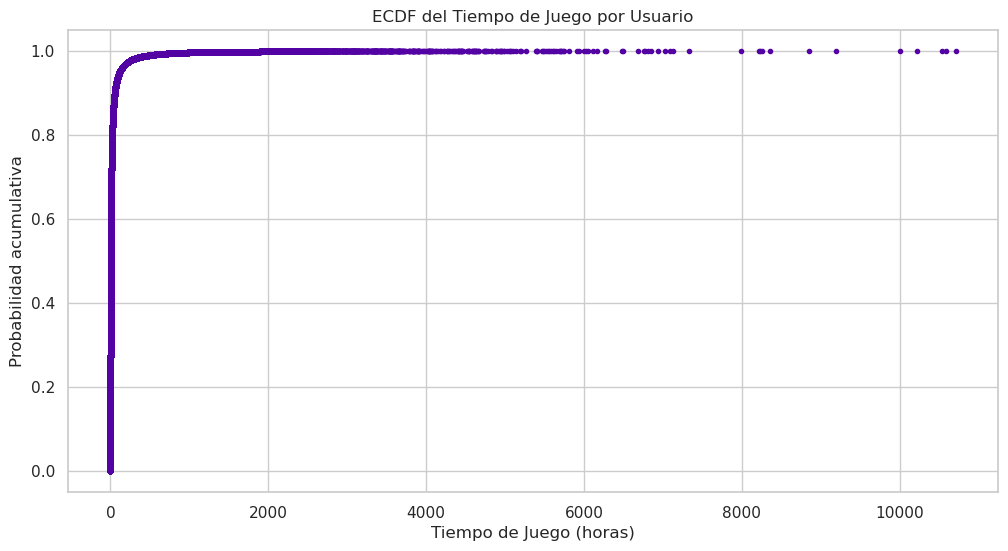

In [77]:
plt.figure(figsize=(12, 6))
n = len(user_hours)
x = np.sort(user_hours['playtime_forever'])
y = np.arange(1, n + 1) / n
plt.plot(x, y, marker='.', linestyle='none')
plt.title('ECDF del Tiempo de Juego por Usuario')
plt.xlabel('Tiempo de Juego (horas)')
plt.ylabel('Probabilidad acumulativa')
plt.show()

AHORA VOY A TRABAJAR SOBRE LOS DATAFRAMES QUE ME VAN A SERVIR PARA CUMPLIMENTAR LOS ENDPOINTS Y EL MODELO DE RECOMENDACION

Con el fin de optimizar el funcionamiento de la API se creará un dataframe a partir de la agrupación de sgames('./Data/steam_games.csv) y ureviews('./Data/user_reviews.csv') el cual se llamará games_reviews('./games_reviews.parquet') y luego se creará un Dataframe a partir del archivo sgames('./Data/steam_games.csv) filtrando la informacón necesaria para el funcionamiento del Modelo de Recomendación, al cual llamaré model('./model.parquet'). A su vez se convertirá todo el  Dataset aarchivo extensión 'parquet'

In [78]:
games_reviews = pd.merge(sgames, ureviews, left_on='id', right_on='item_id', how='inner')


In [79]:
games_reviews

,genres,app_name,price,id,developer,anio,user_id,item_id,recommend,anio_post,sentimientos,sentiments
0,Action,Carmageddon Max Pack,9.99,282010,Stainless Games Ltd,1997,InstigatorAU,282010,True,2014,0.000000,0
1,Action,Half-Life,9.99,70,Valve,1998,EizanAratoFujimaki,70,True,2015,-0.000529,-1
2,Action,Half-Life,9.99,70,Valve,1998,GamerFag,70,True,2011,-0.066667,-1
3,Action,Half-Life,9.99,70,Valve,1998,76561198020928326,70,True,2014,-0.075000,-1
4,Action,Half-Life,9.99,70,Valve,1998,Bluegills,70,True,2013,0.202070,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49645,Action,Counter-Strike: Condition Zero,9.99,80,Valve,2004,76561198023508728,80,False,2014,0.000000,0
49646,Action,Counter-Strike: Condition Zero,9.99,80,Valve,2004,Lone_walker,80,True,2013,0.500000,1
49647,Action,Counter-Strike: Condition Zero,9.99,80,Valve,2004,green290,80,True,2015,0.062500,1
49648,Action,Counter-Strike: Condition Zero,9.99,80,Valve,2004,174gamecuman700kngkakak,80,True,2014,0.000000,0


In [80]:
games_reviews.isnull().sum()

genres          0
app_name        0
price           0
id              0
developer       0
anio            0
user_id         0
item_id         0
recommend       0
anio_post       0
sentimientos    0
sentiments      0
dtype: int64

In [81]:
games_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49650 entries, 0 to 49649
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        49650 non-null  object 
 1   app_name      49650 non-null  object 
 2   price         49650 non-null  float64
 3   id            49650 non-null  int64  
 4   developer     49650 non-null  object 
 5   anio          49650 non-null  int64  
 6   user_id       49650 non-null  object 
 7   item_id       49650 non-null  int64  
 8   recommend     49650 non-null  bool   
 9   anio_post     49650 non-null  int64  
 10  sentimientos  49650 non-null  float64
 11  sentiments    49650 non-null  int64  
dtypes: bool(1), float64(2), int64(5), object(4)
memory usage: 4.6+ MB


In [82]:
games_reviews.to_csv('./Data/games_reviews.csv', index=False, encoding='utf-8')

In [83]:
modelo = sgames[["id", "app_name", "genres"]]
modelo

,id,app_name,genres
0,761140,Lost Summoner Kitty,Action
1,643980,Ironbound,Free to Play
2,670290,Real Pool 3D - Poolians,Casual
3,767400,弹炸人2222,Action
4,772540,Battle Royale Trainer,Action
...,...,...,...
28702,745400,Kebab it Up!,Action
28703,773640,Colony On Mars,Casual
28704,733530,LOGistICAL: South Africa,Casual
28705,610660,Russian Roads,Indie


In [84]:
modelo.to_csv('./Data/modelo.csv', index=False, encoding='utf-8')

In [90]:
sgames

,genres,app_name,price,id,developer,anio
0,Action,Lost Summoner Kitty,4.99,761140,Kotoshiro,2018
1,Free to Play,Ironbound,0.00,643980,Secret Level SRL,2018
2,Casual,Real Pool 3D - Poolians,0.00,670290,Poolians.com,2017
3,Action,弹炸人2222,0.99,767400,彼岸领域,2017
4,Action,Battle Royale Trainer,3.99,772540,Trickjump Games Ltd,2018
...,...,...,...,...,...,...
28702,Action,Kebab it Up!,1.99,745400,Bidoniera Games,2018
28703,Casual,Colony On Mars,1.99,773640,"Nikita ""Ghost_RUS""",2018
28704,Casual,LOGistICAL: South Africa,4.99,733530,Sacada,2018
28705,Indie,Russian Roads,1.99,610660,Laush Dmitriy Sergeevich,2018


In [91]:
uitems

,user_id,items_count,steam_id,item_id,item_name,playtime_forever
0,76561197970982479,277,76561197970982479,10,Counter-Strike,0.10
1,76561197970982479,277,76561197970982479,30,Day of Defeat,0.12
2,76561197970982479,277,76561197970982479,300,Day of Defeat: Source,78.88
3,76561197970982479,277,76561197970982479,240,Counter-Strike: Source,30.88
4,76561197970982479,277,76561197970982479,3830,Psychonauts,5.55
...,...,...,...,...,...,...
3246357,76561198329548331,7,76561198329548331,304930,Unturned,11.28
3246358,76561198329548331,7,76561198329548331,227940,Heroes & Generals,0.72
3246359,76561198329548331,7,76561198329548331,388490,One Way To Die: Steam Edition,0.05
3246360,76561198329548331,7,76561198329548331,521570,You Have 10 Seconds 2,0.07


In [89]:
ureviews

,user_id,item_id,recommend,anio_post,sentimientos,sentiments
0,76561197970982479,1250,True,2011,0.174444,1
1,76561197970982479,22200,True,2011,0.337500,1
2,76561197970982479,43110,True,2011,0.075000,1
3,js41637,251610,True,2014,0.114583,1
4,js41637,227300,True,2013,-0.036111,-1
...,...,...,...,...,...,...
58425,76561198312638244,70,True,2014,0.233333,1
58426,76561198312638244,362890,True,2014,0.142500,1
58427,LydiaMorley,273110,True,2014,0.087500,1
58428,LydiaMorley,730,True,2014,0.000000,0


In [104]:
# Selecciono las columnas necesarias de los dataframes que utilizaré para el endpoint UserforGenre
data_items = uitems[["user_id", "item_id", "playtime_forever"]]
data_reviews = ureviews[["user_id", "item_id"]]
sgames_subset = sgames[["id", "genres", "anio"]]

# Realizo los merges de manera encadenada
merged_data = (data_items.merge(data_reviews, on=["user_id", "item_id"], how="inner").merge(sgames_subset, left_on="item_id", right_on="id", how="inner")
)

# Agrupo y sumo las horas jugadas por usuario, género y año
UsersForGenre = (merged_data.groupby(["user_id", "genres", "anio"])["playtime_forever"].sum().reset_index()
)

In [105]:
UsersForGenre

,user_id,genres,anio,playtime_forever
0,--000--,Action,2009,49.15
1,--ace--,Action,2011,21.15
2,--ionex--,Action,2011,14.03
3,--ionex--,Action,2012,591.30
4,-2SV-vuLB-Kg,Action,2012,501.15
...,...,...,...,...
35419,zyr0n1c,Action,2011,10.22
35420,zyr0n1c,Action,2012,959.08
35421,zyr0n1c,Action,2013,153.20
35422,zyr0n1c,Action,2014,10.72


In [109]:
UsersForGenre.to_csv('./Data/UserForGenre.csv', index=False, encoding='utf-8')

In [ ]:
csv_a_parquet('./Data/steam_games.csv', 'steam_games.parquet')

In [ ]:
csv_a_parquet('./Data/user_items.csv', 'user_items.parquet')

In [ ]:
csv_a_parquet('./Data/user_review.csv', 'user_reviews.parquet')

In [ ]:
csv_a_parquet('./Data/games_reviews.csv', 'games_reviews.parquet')

In [ ]:
csv_a_parquet('./Data/modelo.csv', 'modelo.parquet')

In [110]:
csv_a_parquet('./Data/UserForGenre.csv', 'userforgenre.parquet')